In [1]:
import numpy as np
import numpy.linalg as npla

import matplotlib.pyplot as plt

# for numerical integration
import scipy.integrate as scint

# for interpolation
import scipy.interpolate as scinterp

### Functions

This function integrates along lines

In [2]:
def integrate_segment_2d(f, xs, xe):
    if isinstance(xs, list):
        xs = np.array(xs)
    if isinstance(xe, list):
        xe = np.array(xe)
    return npla.norm(xs - xe) * scint.quad(lambda s : f(xs[0] + s * (xe[0] - xs[0]), xs[1] + s * (xe[1] - xs[1])), 0.0, 1.0, complex_func=False, limit=10000)[0]

This is the filtering for the Radon transform.

In [3]:
def filter_radon_slice(p, f, eps=1E-4):
    dp = p[1] - p[0]
    df = np.zeros(f.shape)
    df[1:] = np.diff(f).ravel() / dp
    return np.array([ (dp / np.pi) * np.sum(df * (_p - p) / ((_p - p) ** 2 + eps ** 2)) for _p in p ], dtype=float)

This backprojects a single slice.

In [4]:
def backproject_radon_slice(f, p, t, mx, my):
    dp = p[1] - p[0]
    B = np.zeros(mx.shape)
    sidx = np.where(np.abs(f) > 1E-16)[0]
    for Is in sidx:
        B = B + f[Is] * np.where(np.abs(mx * np.cos(t) + my * np.sin(t) - p[Is]) / dp <= 1/2, 1.0, 0.0)
    return B

This maps coordinates to indices to use ``pyplot.imshow``.

In [5]:
def x_coord_to_index(x):
    if isinstance(x, list):
        x = np.array(x)
    return (num_x - 1) * (x - px.min()) / (px.max() - px.min())
    
def y_coord_to_index(y):
    if isinstance(y, list):
        y = np.array(y)
    return (num_x - 1) * (y - py.min()) / (py.max() - py.min())

Image coordinates

In [6]:
# number of nodes
num_p = 512
num_x = 512

# detector radius
r_D = 1.25

# spatial coordinates
px = np.linspace(-2, 2, num_x)
py = np.linspace(-2, 2, num_x)
[ mx, my ] = np.meshgrid(px, py)

# SPECT

In [7]:
spect_path = 'hw5/IBM2101_HW05_SPECT_AA05_A.npz'
spect = np.load(spect_path)
S = spect['S']
pt = spect['theta']
pb_c = spect['p'] # bin centers
pb_e = spect['pb'] # bin edges

FileNotFoundError: [Errno 2] No such file or directory: 'hw5/IBM2101_HW05_SPECT_AA05_A.npz'

In [8]:
# number of nodes
num_p = 512
num_x = 512

# number of bins
num_pb = S.shape[1]
# number of angles
num_t = S.shape[0]

print(S.shape,theta.shape,pb_c.shape,pb_e.shape)

NameError: name 'S' is not defined

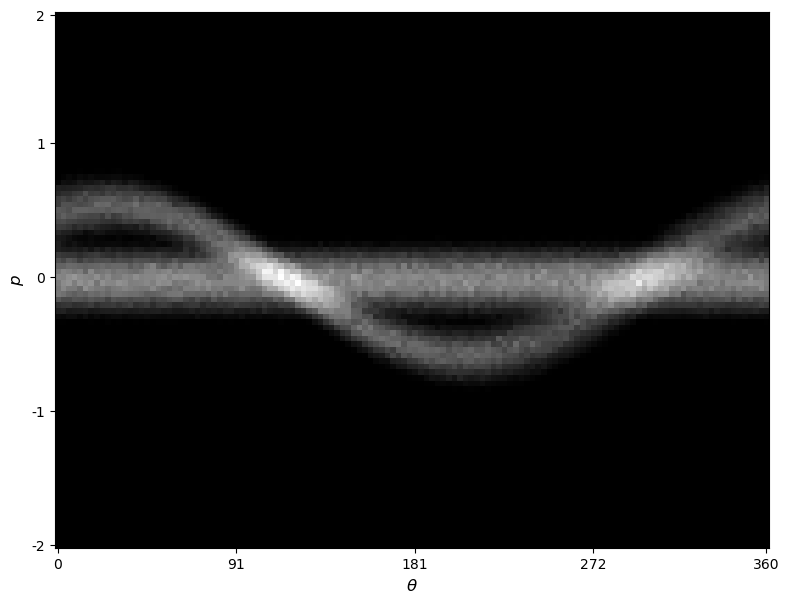

In [60]:
# indices for ticks
xidx = [ I * num_x // 4 for I in range(4) ] + [ num_x - 1 ]
pbidx = [ I * num_pb // 4 for I in range(4) ] + [ num_pb - 1 ]
tidx = [ I * num_t // 4 for I in range(4) ] + [ num_t - 1 ]
bidx = [ I * num_t // 4 for I in range(2) ] + [ num_t//2 - 1 ]

ct = 180 / np.pi

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# radon
ax.imshow(S.T, vmin=0, cmap='gray', origin='lower')
ax.set_xlabel('$\\theta$', fontsize=12)
ax.set_ylabel('$p$', fontsize=12)
ax.set_xticks(tidx, labels=['{:.0f}'.format(ct * pt[I]) for I in tidx ], fontsize=10)
ax.set_yticks(pbidx, labels=['{:.0f}'.format(pb_c[I]) for I in pbidx ], fontsize=10)
ax.set_xlim([ 0, num_t-1 ])
ax.set_box_aspect(num_pb/num_t)

plt.show()

## Filtered backprojection

In [61]:
FBP = np.zeros((num_x, num_x))
dpt = pt[1] - pt[0]
for _pt, _pf in zip(pt, S):     
    # progressive backprojection
    FBP = FBP + dpt * backproject_radon_slice(filter_radon_slice(pb_c, _pf), pb_c, _pt, mx, my)

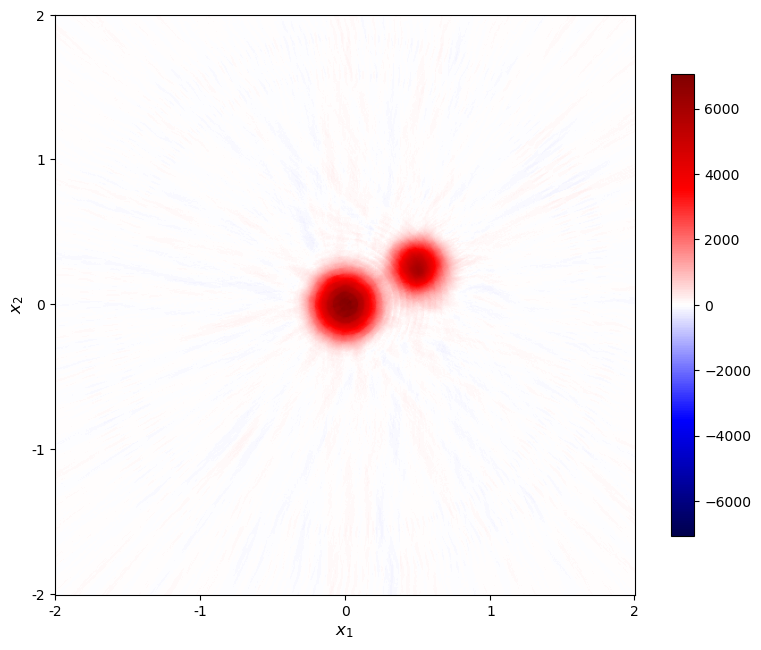

In [62]:
# indices for ticks
xidx = [ I * num_x // 4 for I in range(4) ] + [ num_x - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
im = ax.imshow(FBP, vmin=-FBP.max(), vmax=+FBP.max(), cmap='seismic', origin='lower')
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_xticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
ax.set_yticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
plt.colorbar(im, shrink=0.6)

plt.show()

## Chang method

El método de corrección de atenuación de Chang consiste en multiplicar el resultado de aplicar la retroproyección filtrada a los datos de SPECT por una máscara $C = C(\vec{r})$

In [ ]:
C = np.zeros((num_x, num_x))

'''
Completar
'''

In [ ]:
# FBP
FBP = np.zeros((num_x, num_x))
dpt = pt[1] - pt[0]
for _pt, _pf in zip(pt, Pf):     
    # progressive backprojection
    FBP = FBP + dpt * backproject_radon_slice(filter_radon_slice(pb_c, _pf), pb_c, _pt, mx, my)

# indices for ticks
xidx = [ I * num_x // 4 for I in range(4) ] + [ num_x - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')


_X = C * FBP
im = ax.imshow(_X, vmin=-_X.max(), vmax=+_X.max(), cmap='seismic', origin='lower')
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_xticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
ax.set_yticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
plt.colorbar(im, shrink=0.6)

plt.savefig(FIG_FOLDER + 'IBM2101_HW05_SPECT_FBP_COMP_ATTENUATION_AA{:02d}_NEV{:d}_RC{:.2f}.PNG'.format(_th_col, N_avg, rc), dpi=300, bbox_inches='tight')

plt.show()

# PET

In [64]:
PET_path = 'hw5/IBM2101_HW05_PET_NOA.npz'
PET = np.load(PET_path)
S = PET['S']
pt = PET['theta']
pb_c = PET['p'] # bin centers
pb_e = PET['pb'] # bin edges

## Filtered backprojection

In [65]:
FBP = np.zeros((num_x, num_x))
dpt = pt[1] - pt[0]
for _pt, _pf in zip(pt, S):     
    # progressive backprojection
    FBP = FBP + dpt * backproject_radon_slice(filter_radon_slice(pb_c, _pf), pb_c, _pt, mx, my)

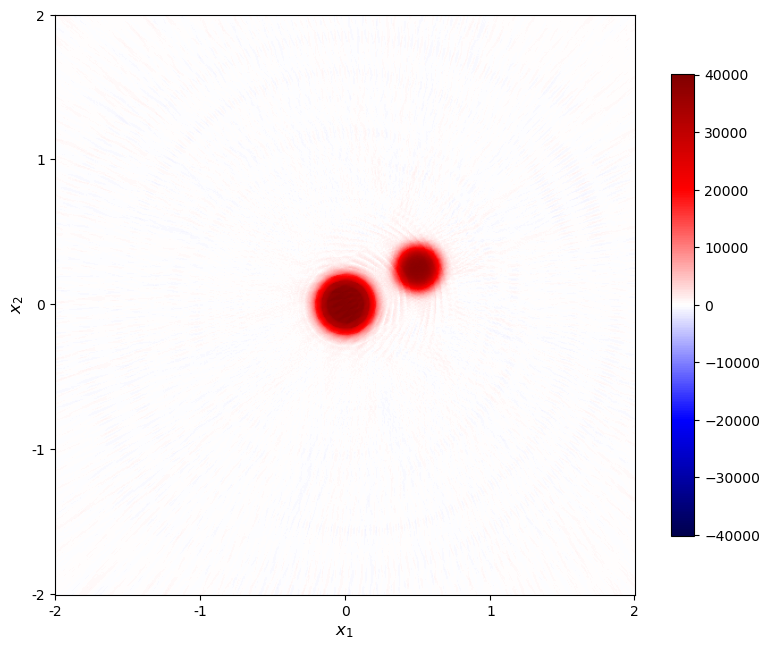

In [66]:
# indices for ticks
xidx = [ I * num_x // 4 for I in range(4) ] + [ num_x - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
im = ax.imshow(FBP, vmin=-FBP.max(), vmax=+FBP.max(), cmap='seismic', origin='lower')
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_xticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
ax.set_yticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
plt.colorbar(im, shrink=0.6)

plt.show()

## Correcting atenuation

In [ ]:
CS = np.array([ 'COMPLETAR' for _pf in S ])

In [ ]:
FBP = np.zeros((num_x, num_x))
dpt = pt[1] - pt[0]
for _pt, _pf in zip(pt, CS):     
    # progressive backprojection
    FBP = FBP + dpt * backproject_radon_slice(filter_radon_slice(pb_c, _pf), pb_c, _pt, mx, my)

In [ ]:
# indices for ticks
xidx = [ I * num_x // 4 for I in range(4) ] + [ num_x - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
im = ax.imshow(FBP, vmin=-FBP.max(), vmax=+FBP.max(), cmap='seismic', origin='lower')
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_xticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
ax.set_yticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
plt.colorbar(im, shrink=0.6)

plt.show()